In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri May 27 22:15:13 2022

@author: rodrigo
"""

#Cargando librerías 
import importlib

import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import pandas as pd
import os
import sys  
import random

root = os.getcwd() + "/.."

sys.path.insert(0, root)

import src.positioning_sensors as ps
importlib.reload(ps)

import src.network_fitness as netfit
importlib.reload(netfit)

import src.manageExperiments as me
importlib.reload(me)

import config.config as cfg
importlib.reload(cfg)

from geneticalgorithm import geneticalgorithm as ga

import itertools as it

#read_global_variables

plt.style.use("ggplot")

fn = "linz_with_init_net.txt"
setup = me.readConfigFile(fn)


#cargamos imagenes en luminance e importance
ilumina = setup["folder_input"] + setup["input_ntli"]
niveles = setup["folder_input"] + setup["input_evm"]
sigma_y = setup['filterg_sy']
sigma_x = setup['filterg_sx']
sigma = [sigma_y,sigma_x]

#Loading precalculated local and directed empirical variograms
path2output_semivars = (cfg.experiment 
          + setup["experiment_id"]
          + setup["folder_semivariances"]
          + setup["output_semivariances"] 
                       )


filesv = path2output_semivars + ".csv"
filesvmask = path2output_semivars + "mask.csv"

path2optimum_values_file = (cfg.experiment 
                           + setup["experiment_id"] 
                           + setup["folder_output"] 
                           )

saveOptimumValuesTofile = (path2optimum_values_file
                           + setup["output_values"]
                          )

saveArgsTofile = (path2optimum_values_file
                  + setup["output_args"]
                 )

data = pd.read_csv(filesv)
data_m = pd.read_csv(filesvmask)
variogram_set = np.array(data.iloc[:,3:])
variogram_set_m = np.array(data_m.iloc[:,3:])


#NLTI: luminance
#luminance = ps.readIMG(cfg.data + ilumina)

ilumina = cfg.data + setup["folder_input"] + setup["input_ntli"]
niveles = cfg.data + setup["folder_input"] + setup["input_evm"]

#NTLI: luminance
NTLI = ps.readIMG(ilumina)

FDNTLI = sp.ndimage.filters.gaussian_filter(NTLI, 
                                            sigma, 
                                            mode = setup['gaussian_mode'])



FDNTLI = (FDNTLI>=setup['neglect_values'])*FDNTLI

EAM = ps.readIMG(niveles, invert = True)

EAM[EAM==254]=1.0

th = int(setup["desaturation_th"])

#EAM: Environtmental attention map is the importance
#EAM = ps.readIMG(cfg.data + niveles, invert = True)


#nonsat, b = ps.desaturate(luminance, th = setup["desaturation_th"])

nonsat = FDNTLI
variograms = variogram_set.reshape(len(variogram_set),nonsat.shape[0],nonsat.shape[1])
variograms_m = variogram_set_m.reshape(len(variogram_set),nonsat.shape[0],nonsat.shape[1])

coords = np.array(data.iloc[:,1:3])

from IPython.display import clear_output

r2 = list([])
results2 = list([])




allc = setup["sensitivity_c"]

alls = setup["nsensors"]

L = setup['init_fixed_net']

network = np.array(L).flatten()

R = np.arange(len(L))


algorithm_parameters = setup["ga_params"]

/var/folders/k9/wpfgnz550_n_k3t9tg8scnlw0000gn/T/ipykernel_58134/3438144505.py:94: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  FDNTLI = sp.ndimage.filters.gaussian_filter(NTLI,


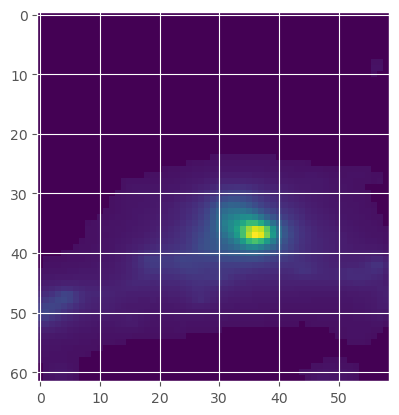

In [2]:
plt.imshow(FDNTLI)

In [3]:
def generateVarbounds(sensor, image, r):
    
    
    N = len(sensor) 
    ix_n = np.arange(N)
    varbounds = [[0, image.shape[0]-1], [0,image.shape[1]-1]]*N
    
    #all the combinations
    C = list(it.combinations(ix_n, r))
    varbounds.append([0, len(C)-1]) 
    return np.array(varbounds)



def plotSolution(sensor_list, X, combinations):
    
    
    n = int(len(sensor_list)/2)
    ix_rcs = int(X[-1])
    
    Z = combinations[ix_rcs]
    

    vect_selection = np.zeros(n)
    vect_selection[np.array(Z)] = 1
    
    for ix, x in enumerate(vect_selection):
    
        if x == 1:
            
            sensor_list[ix*2:ix*2+2] = X[ix*2:ix*2+2]
            
    return sensor_list
    


def plot_Locations(M, L):
    
    for loc in L:
        for i in it.product([0,1,2], [0,1,2]): 
            if loc[0]+i[0]-1 >= 0 and loc[0]+i[0]-1 < M.shape[0] and (loc[1] + i[1]-1)>=0 and (loc[1] + i[1]-1)<M.shape[1]:
                tup = (loc[0]+i[0]-1, loc[1] + i[1]-1)
                M[tup] = 2
        M[tuple(loc)] = 1
    return M


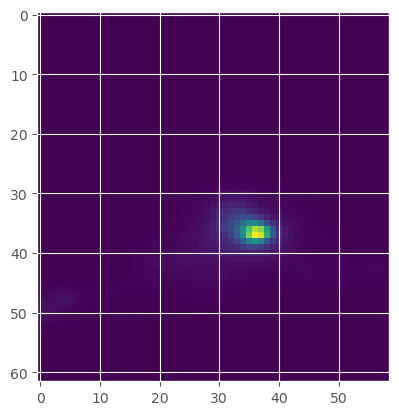

In [4]:
plt.imshow(FDNTLI**2)

In [5]:
FDNTLI.shape

(62, 59)

 W = i*a^(p)
Selct cost functions: 
 'xor','max' or 'cover'
 The best solution found:                                                                           
 [49.  5. 40. 48. 49.  2. 47. 51. 55. 29.  2.]

 Objective function:
 -0.8485090416099789


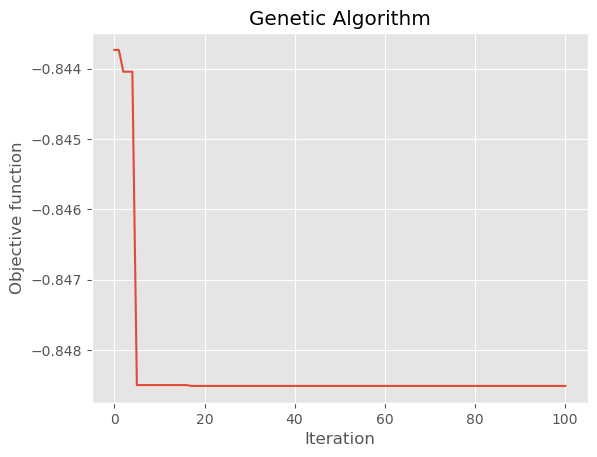

 W = i*a^(p)
Selct cost functions: 
 'xor','max' or 'cover'
 The best solution found:                                                                           
 [48.  3. 46. 19. 36. 36. 39. 35. 40. 32.  1.]

 Objective function:
 -0.9310909339586374


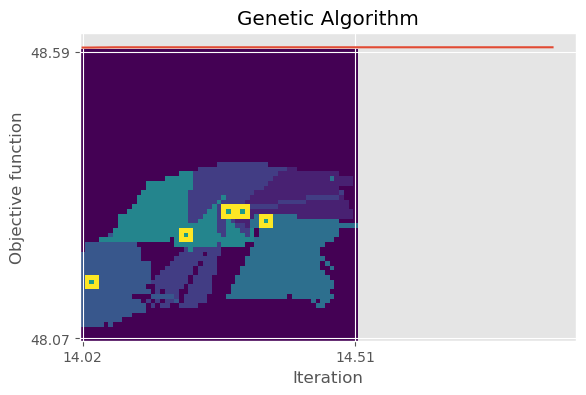

 W = i*a^(p)
Selct cost functions: 
 'xor','max' or 'cover'
 The best solution found:                                                                           
 [42. 57. 30.  3. 36. 35. 40. 48. 48.  3.  4.]

 Objective function:
 -0.9685660365264855


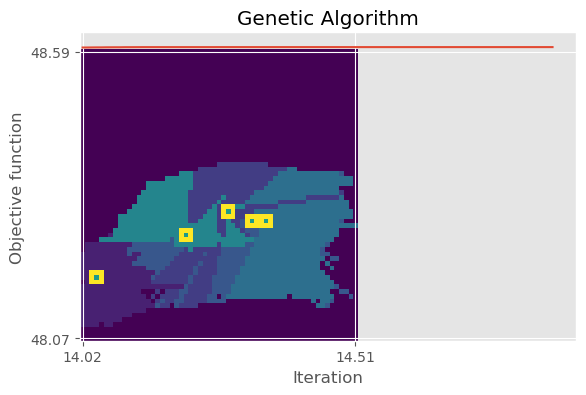

 W = i*a^(p)
Selct cost functions: 
 'xor','max' or 'cover'
 The best solution found:                                                                           
 [39. 29. 48.  3. 36. 36. 26.  5. 42. 57.  1.]

 Objective function:
 -0.9767070520667607


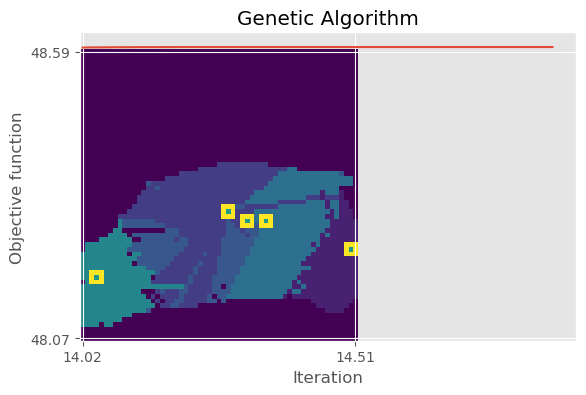

 W = i*a^(p)
Selct cost functions: 
 'xor','max' or 'cover'
 The best solution found:                                                                           
 [48.  3. 42. 57. 39. 35. 34. 33. 36. 36.  0.]

 Objective function:
 -0.977414679524735


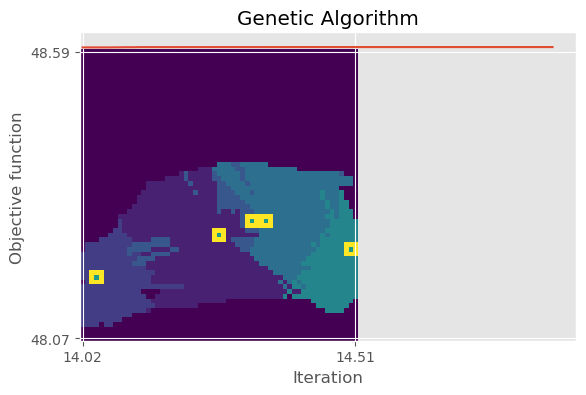

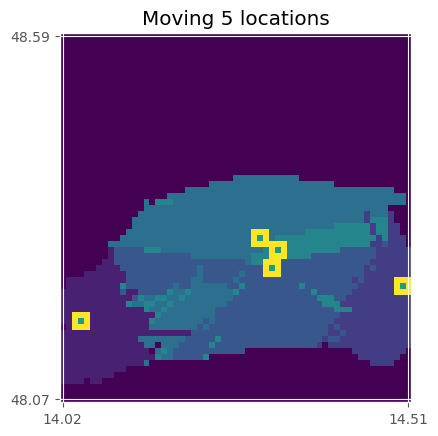

In [6]:
#sensors allowed to modify their position


#left=14.02492239, 
#bottom=48.07084832444445, 
#right=14.51658886, 
#top=48.587514784444444




F = []

c = allc[0]
n_sensors = alls[0]


for n in range(1, 6):


    sensitivity = ps.f5(FDNTLI, EAM, c)
    aptitude = netfit.NetworkFitness(FDNTLI**2,
                                     EAM,
                                     sensitivity,
                                     variograms, 
                                     variograms_m,
                                     coords,
                                     network,
                                     n
                                    )

    aptitude.selectFitnessFunction("max")

    f = aptitude.f

    vb  = generateVarbounds(L, FDNTLI, n)
    model = ga(function = f,
             dimension = len(vb),
             algorithm_parameters = algorithm_parameters,
             variable_type = 'int',
             variable_boundaries = vb,
             convergence_curve = True
            )

    model.run()

    convergence=model.report
    solution=model.output_dict

    XX = aptitude.init_network
    plt.imshow(aptitude.project(XX))

    #empty_space = np.zeros((vb[0][1]+1,vb[1][1]+1))
    A = np.copy(aptitude.init_network)
    B = model.output_dict['variable']
    combinations = aptitude.c
    new_net = plotSolution(A, B, combinations)


    plt.imshow(aptitude.project(new_net))



    L = new_net.reshape(5,2)
    
    M = np.copy(FDNTLI)

    location_map = np.zeros(M.shape)

    #we generate a map of locations
    R = plot_Locations(location_map, L)

    location_map_region = np.zeros(M.shape)

    for i in it.product(range(0,M.shape[0]), range(0,M.shape[1])): 

        if R[tuple(i)] != 0:
            location_map_region[tuple(i)] = R[tuple(i)]*np.max(aptitude.project(new_net))+1
        else:
            location_map_region[tuple(i)] = aptitude.project(new_net)[tuple(i)]


            
    ax = plt.gca()
    ax.imshow(location_map_region)

    # Set xticks and yticks
    ax.set_xticks([0, location_map_region.shape[1]-1])
    ax.set_yticks([0, location_map_region.shape[0]-1])
    ax.set_yticklabels([48.59, 48.07])
    ax.set_xticklabels([14.02, 14.51])
    ax.set_title("Moving {s} locations".format(s = n))
    #ax.title("Moving {s} locations".format(s = n))

    #plt.show()
    #plt.imshow(location_map_region)
    #plt.savefig("movingfig_{s}.pdf".format(s = n))
    plt.savefig("Figure_{s}_experiment01.pdf".format(s = n),format = 'pdf', dpi = 500,bbox_inches = "tight")
    #plt.imagesave()
    F.append(model.output_dict['function'])
    

In [8]:
new_net

array([48,  3, 42, 57, 39, 35, 34, 33, 36, 36])

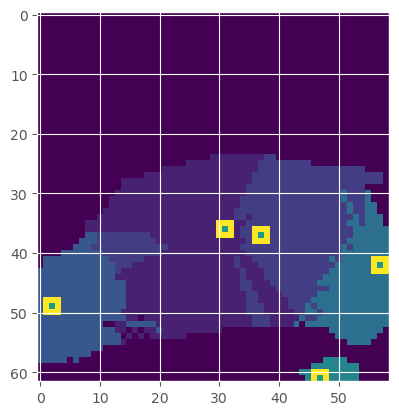

In [7]:
plt.imshow(location_map_region)

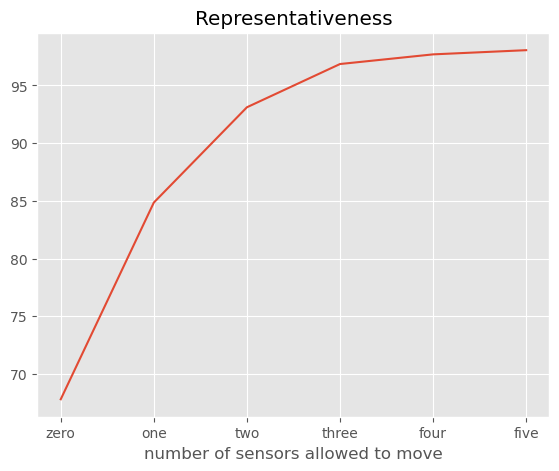

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math
y = np.append(0.678,-np.array(F))*100
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, .8, 0.8]) # main axes

ax.plot([0,1,2,3,4,5], y)
ax.set_xlabel('number of sensors allowed to move')
ax.set_title('Representativeness')
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(['zero','one','two','three','four','five'])
plt.savefig("Representativeness.pdf".format(s = n),format = 'pdf', dpi = 500,bbox_inches = "tight")
plt.show()

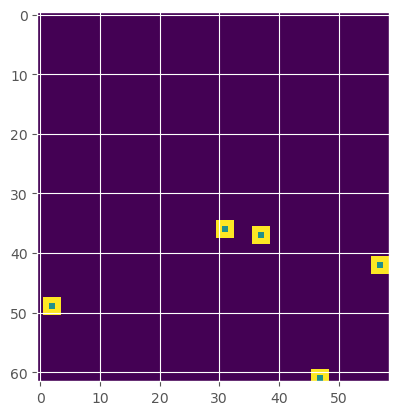

In [9]:
R = plot_Locations(location_map, L)
plt.imshow(R)

In [10]:
fig = plt.figure()
ax.imshow(location_map_region)

<Figure size 640x480 with 0 Axes>

In [11]:
location_map_region = np.zeros(M.shape)

for i in it.product(range(0,M.shape[0]), range(0,M.shape[1])): 
    if R[tuple(i)] != 0:
        location_map_region[tuple(i)] = R[tuple(i)]*np.max(aptitude.project(new_net))+1
    else:
        location_map_region[tuple(i)] = FDNTLI[tuple(i)]

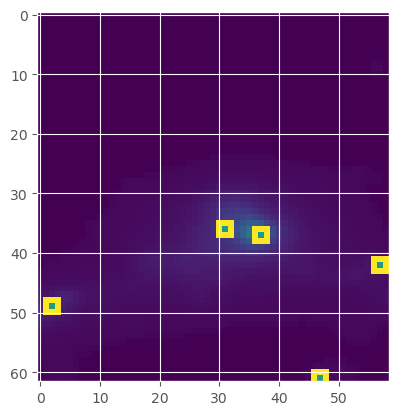

In [12]:
plt.imshow(location_map_region)